In [1]:
# Filename: 1.0-initial-data-exploration.ipynb
# Author: Eyosyas Dagnachew
# Description: This file is just to explore the MNIST dataset and get to know it better.

In [2]:
# Imports
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict

In [3]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
# Load in MNIST dataset
train_dataset = torchvision.datasets.MNIST(root="../../data", 
                                           train=True, 
                                           transform=transforms.Compose([transforms.ToTensor()]),
                                           download=False)
test_dataset = torchvision.datasets.MNIST(root="../../data",
                                          train=False,
                                          transform=transforms.Compose([transforms.ToTensor()]),
                                          download=False)

In [5]:
# Init data loader for MNIST dataset
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=100,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=100,
                                          shuffle=False)
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x21442c8ab20>,
 <torch.utils.data.dataloader.DataLoader at 0x21442c8aac0>)

In [6]:
# How big is the dataset?
train_dataset, test_dataset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ../../data
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ../../data
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

In [7]:
# Understand the train_loader
for batch in train_loader:    # iterates over batches
    print("len(batch) = {} --> batch[0] contains images and batch[1] contains labels.".format(len(batch)))
    print("batch[0].size() = {} --> The images are 28x28 but PyTorch wants that 1 there for some reason.".format(batch[0].size()))
    print("batch[1].size() = {}".format(batch[1].size()))
    break
    # batch is a tensor with size 2, one tensor with the images and one with the labels
    # batch[0] has size 100 

len(batch) = 2 --> batch[0] contains images and batch[1] contains labels.
batch[0].size() = torch.Size([100, 1, 28, 28]) --> The images are 28x28 but PyTorch wants that 1 there for some reason.
batch[1].size() = torch.Size([100])


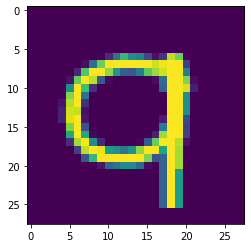

In [8]:
# Visualize a sample
plt.imshow(batch[0][0].view(28,28)) # reshapes batch[0][0] from [1, 28, 28] to [28, 28], can also use plt.imshow(batch[0][0][0])
plt.show()

In [9]:
# Are the classes balanced?
total_train_images = 0
train_class_cnt = Counter()
for batch in train_loader:
    X, y = batch
    for label in y:
        train_class_cnt[int(label)] += 1
        total_train_images += 1

total_test_images = 0
test_class_cnt = Counter()
for batch in test_loader:
    X, y = batch
    for label in y:
        test_class_cnt[int(label)] += 1
        total_test_images += 1

print("Training Dataset")
train_class_cnt = OrderedDict(sorted(train_class_cnt.items(), key=lambda x: x[0]))
for key, value in train_class_cnt.items():
    print("{}: {:4} images, {:.2f}%".format(key, value, (value/total_train_images)*100))
print("Total Number of Training Images: {}".format(total_train_images))

print()

print("Testing Dataset")
test_class_cnt = OrderedDict(sorted(test_class_cnt.items(), key=lambda x: x[0]))
for key, value in test_class_cnt.items():
    print("{}: {:4} images, {:.2f}%".format(key, value, (value/total_test_images)*100))
print("Total Number of Testing Images: {}".format(total_test_images))

# Yes, the classes are balanced for the most part (~10% of each class in both training and testing datasets)

Training Dataset
0: 5923 images, 9.87%
1: 6742 images, 11.24%
2: 5958 images, 9.93%
3: 6131 images, 10.22%
4: 5842 images, 9.74%
5: 5421 images, 9.04%
6: 5918 images, 9.86%
7: 6265 images, 10.44%
8: 5851 images, 9.75%
9: 5949 images, 9.92%
Total Number of Training Images: 60000

Testing Dataset
0:  980 images, 9.80%
1: 1135 images, 11.35%
2: 1032 images, 10.32%
3: 1010 images, 10.10%
4:  982 images, 9.82%
5:  892 images, 8.92%
6:  958 images, 9.58%
7: 1028 images, 10.28%
8:  974 images, 9.74%
9: 1009 images, 10.09%
Total Number of Testing Images: 10000
